In [42]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import star
importlib.reload(star)
Star = star.Star

In [44]:
s = Star(M=1, composition=(0.7, 0.28, 0.02))
s.solve(log=True)
s.save_csv(res=1000)

max error: 9.83646483924409e-07 [3.72295625e+17 4.03537767e+10 1.89029431e+07 3.45230598e+34]4]
Solution: [3.72295622e+17 4.03537766e+10 1.89029433e+07 3.45230606e+34]


In [6]:
mass = np.linspace(0.3, 10, 20)
compositions = [(0.7, 0.29, 0.01), (0.7, 0.28, 0.02)]
solutions = []
for c in compositions:
    stars = np.array([np.zeros(4) for _ in mass])
    for i in range(len(mass)):
        s = Star(M=mass[i], composition=c)
        stars[i] = s.solve(log=True)
    solutions.append(stars)

/Users/leobetancourt/Desktop/NYU/Spring 2024/Stars and Stellar Explosions/stellar_structure/star.py:58: RuntimeWarning: invalid value encountered in scalar power
  return (2.4e6) * rho * (self.X ** 2) * (T_6 ** (2/3)) * np.exp(-33.8 * (T_6 ** (1/3)))
/Users/leobetancourt/Desktop/NYU/Spring 2024/Stars and Stellar Explosions/stellar_structure/star.py:64: RuntimeWarning: invalid value encountered in scalar power
  return (8.7e27) * self.X * self.X_CNO * rho * (T_6 ** (2/3)) * np.exp(-152.3 * (T_6 ** (1/3)))


max error: 9.233921352966427e-07 [4.22371315e+17 2.14127562e+10 1.06576134e+07 9.29016157e+32]]
Solution: [4.22371309e+17 2.14127564e+10 1.06576132e+07 9.29016143e+32]


KeyboardInterrupt: 

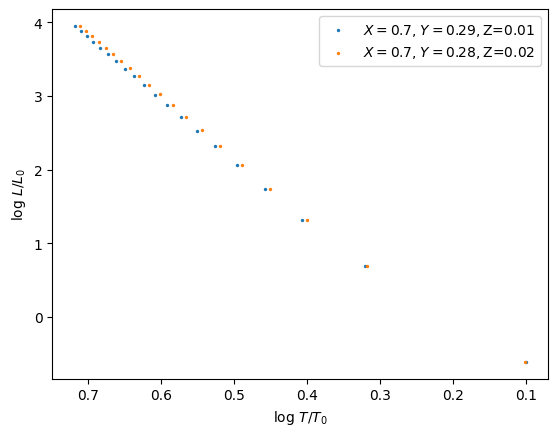

In [35]:
def plot_hr(sols):
    T_0 = 5800
    L_0 = 3.8e33
    for i in range(len(sols)):
        sol = sols[i]
        logT = np.array([])
        for s in sol:
            logT = np.append(logT, np.log10(Star.T_eff(L=s[3], R=s[1]) / T_0))
        logL = np.log10(sol[:, 3] / (L_0))
        plt.scatter(logT, logL, s=2, label=f"$X={compositions[i][0]}$, $Y={compositions[i][1]}, $Z={compositions[i][2]}")
    plt.xlabel(r"log $T/T_0$")
    plt.ylabel(r"log $L/L_0$")
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.show()
    
plot_hr(solutions)